In [63]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
digits = load_digits()

In [64]:
x = digits['data']
x = x/16
x.shape

(1797, 64)

In [65]:
y = digits['target']

In [66]:
# x_new = []
# y_new = []
# for i in range(0,x.shape[0]):
#     for j in range(0,x.shape[1]):
#         if x[i][j] > 0.5:
#             x[i][j] = 1
#         else:
#             x[i][j] = 0
#     if y[i] == 2 or y[i] == 3 or y[i] == 4:
#         x_new.append(x[i])
#         y_new.append(y[i])
# x = np.array(x_new)
# y = np.array(y_new)

In [67]:
p = np.random.rand(10,64)
pi = np.random.rand(10)

In [68]:
def Prob(x,mu):
    p = 1
    for i in range(0,x.shape[0]):
        p *= (mu[i] ** x[i])*(1- mu[i])**(1-x[i])
    return p

In [69]:
def E(p,pi):
    gamma = np.zeros((x.shape[0],pi.shape[0]))
    for i in range(0,x.shape[0]):
        for j in range(0,pi.shape[0]):
            gamma[i][j] = pi[j] * Prob(x[i], p[j])
        gamma[i] /= np.sum(gamma[i])
    return gamma

In [70]:
def M(gamma):
    pi = np.sum(gamma,axis=0)/x.shape[0]

    p = x.T @ gamma
    p = p.T

    n = p.T / (pi*x.shape[0])
    p = n.T
    
    return p, pi

In [71]:
for i in range(0,50):
    gamma = E(p,pi)
    p, pi  = M(gamma)

In [72]:
pi

array([0.32214791, 0.01888691, 0.10402822, 0.05686543, 0.03155472,
       0.04932556, 0.0986489 , 0.05043944, 0.22144702, 0.0466559 ])

In [73]:
p

array([[0.00000000e+00, 3.38363634e-02, 5.05108963e-01, 8.56614082e-01,
        7.06360146e-01, 2.69744392e-01, 1.61479674e-02, 4.59795578e-07,
        7.73338104e-04, 2.44887894e-01, 8.32966779e-01, 6.46714112e-01,
        6.86353951e-01, 5.72490270e-01, 6.25086051e-02, 1.78716351e-04,
        3.22010661e-04, 2.21449580e-01, 5.26394292e-01, 3.09785267e-01,
        6.50045294e-01, 5.69433506e-01, 6.55009140e-02, 8.25587440e-09,
        5.89633301e-08, 5.97187144e-02, 2.98860261e-01, 5.85650850e-01,
        8.31318419e-01, 4.67886489e-01, 6.64959643e-02, 4.61966862e-14,
        0.00000000e+00, 4.86493497e-03, 1.21765833e-01, 4.53403986e-01,
        6.16781140e-01, 5.14015937e-01, 1.37613967e-01, 0.00000000e+00,
        2.98081285e-13, 2.34469236e-02, 2.06769817e-01, 2.92436976e-01,
        2.92047713e-01, 5.48268493e-01, 2.82543504e-01, 7.56921512e-04,
        1.93745188e-06, 6.06698399e-02, 5.59387733e-01, 5.34280379e-01,
        5.00978940e-01, 7.64629642e-01, 4.13563429e-01, 2.463349

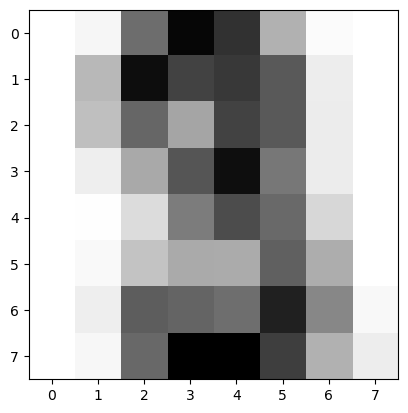

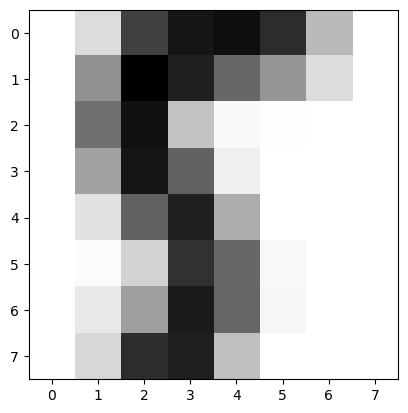

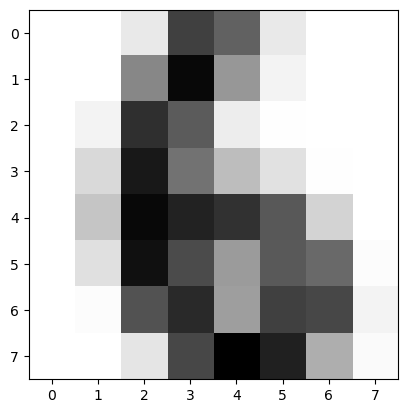

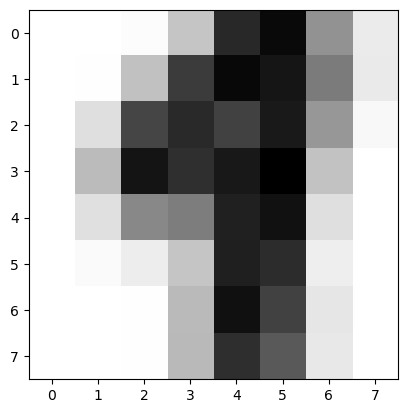

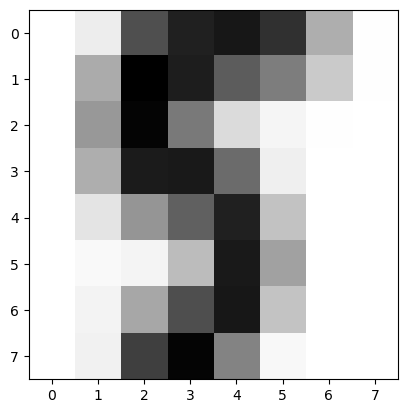

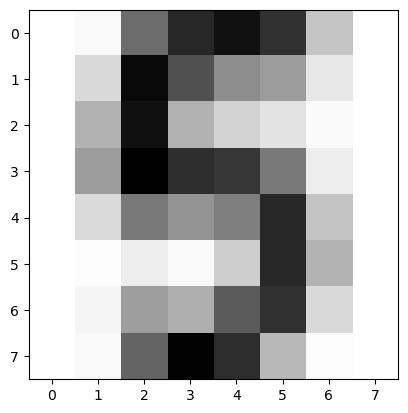

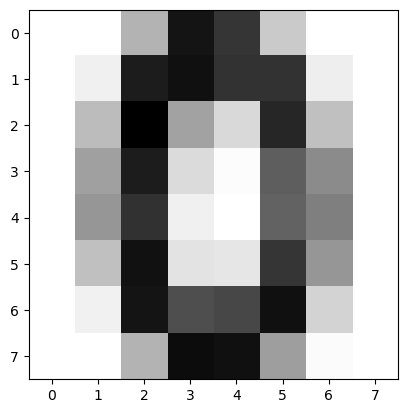

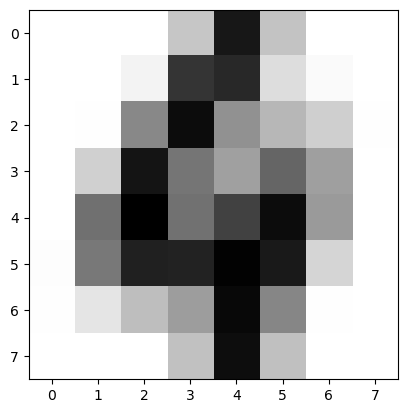

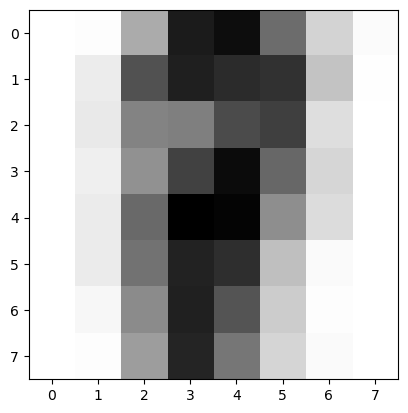

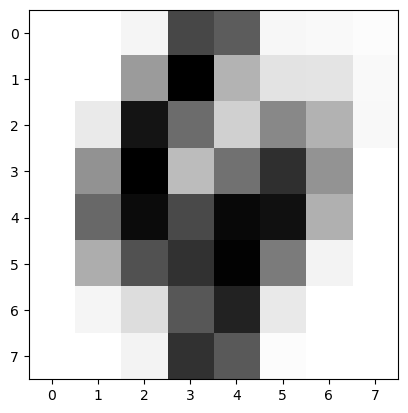

In [74]:
for mean in p:
    plt.imshow(mean.reshape(8,8), cmap = plt.cm.gray_r, interpolation='nearest')
    plt.show()